In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 # Load data from Excel into a DataFrame
df = pd.read_excel('C:/Users/Asus/.vscode/P3- Churn-Modelling Data.xlsx')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Inspect the first few rows
print(df.head())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
churned              int64
dtype: object
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3    

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  churned  
0        101348.88        1  
1        112542.58        0  
2        113931.57        1  
3         93826.63        0  
4       

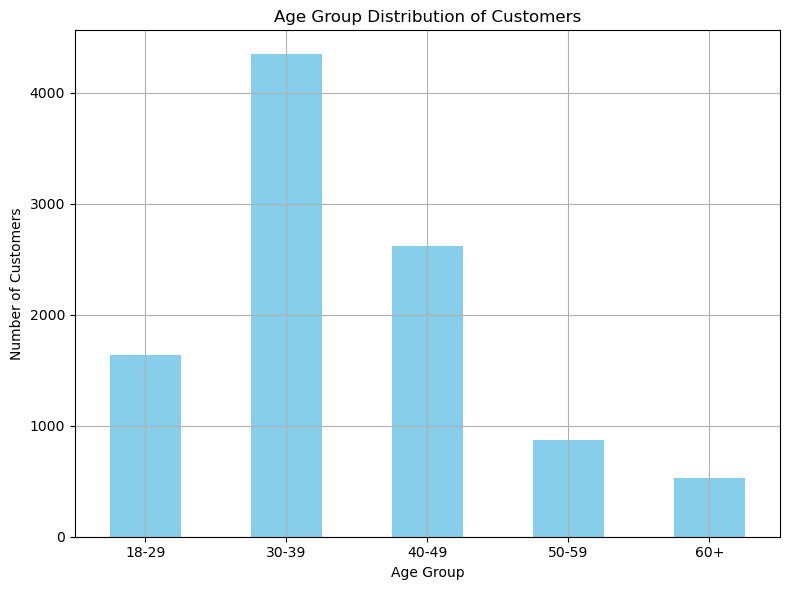


Gender Distribution:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Gender Percentage:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


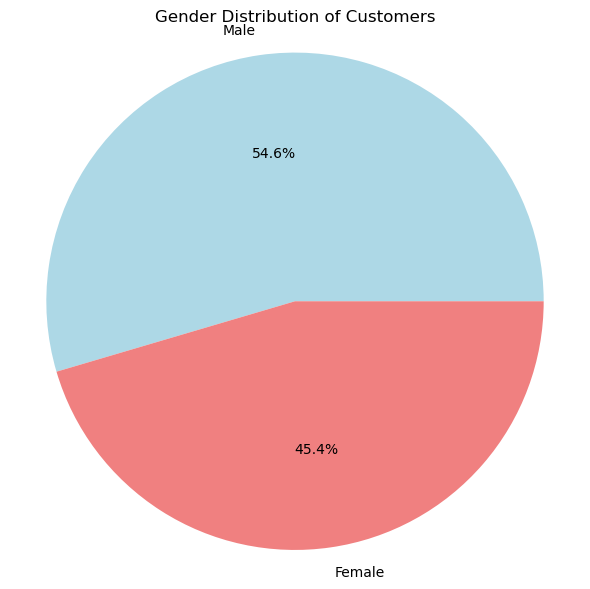

In [4]:
# Data Exploration
print(df.head())  # Display first few rows to understand the structure

# Calculate Age Group Distribution
bins = [18, 30, 40, 50, 60, 100]  # Define age group bins
labels = ['18-29', '30-39', '40-49', '50-59', '60+']  # Labels for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['AgeGroup'].value_counts().sort_index()

# Visualize Age Group Distribution
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze Gender Distribution
gender_counts = df['Gender'].value_counts()
gender_percentage = df['Gender'].value_counts(normalize=True) * 100

print("\nGender Distribution:")
print(gender_counts)
print("\nGender Percentage:")
print(gender_percentage)

# Visualize Gender Distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Churn Rate:
churned
0    79.63
1    20.37
Name: proportion, dtype: float64


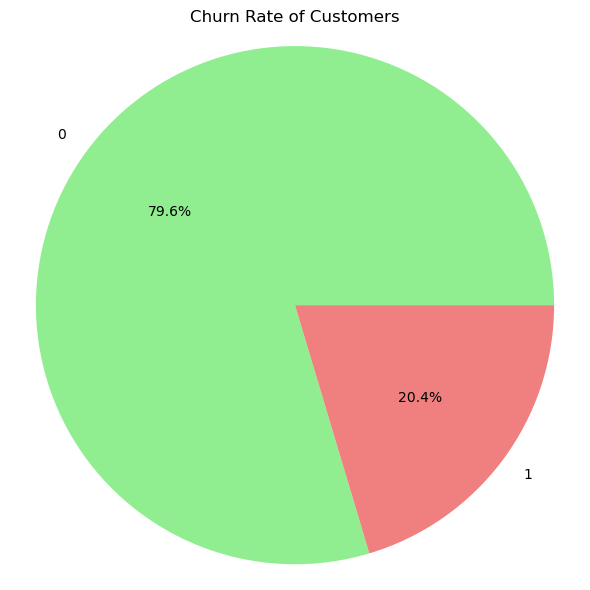

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


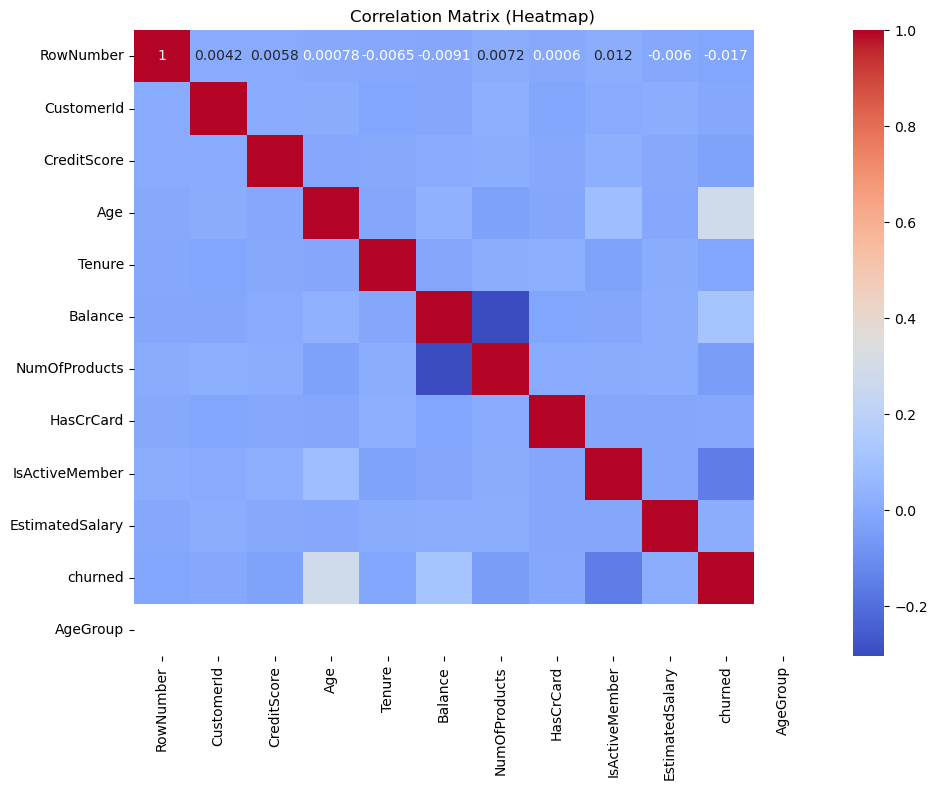

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


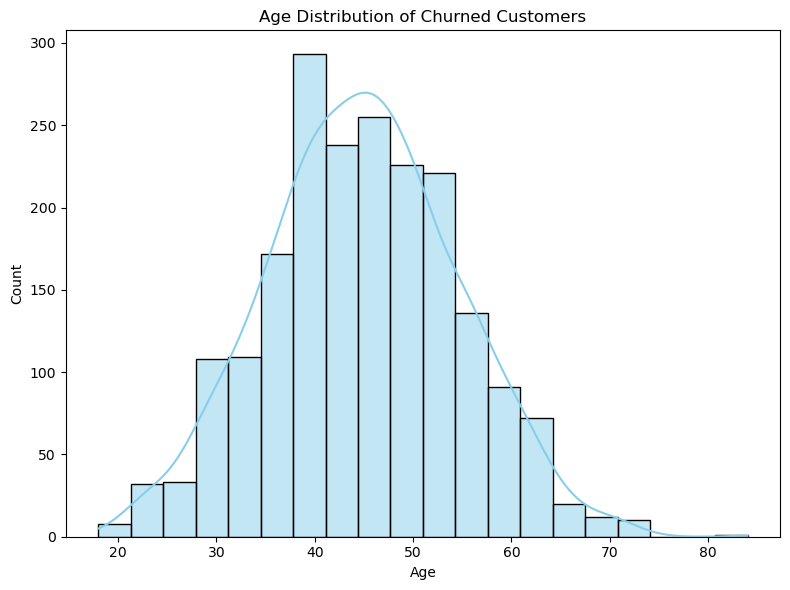

In [5]:
# Identify and exclude non-numeric columns
non_numeric_columns = ['Surname', 'Geography', 'Gender']  # Adjust based on your dataset
numeric_columns = df.columns.difference(non_numeric_columns)

# Ensure relevant columns are numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Churn Rate
churn_rate = df['churned'].value_counts(normalize=True) * 100
print("\nChurn Rate:")
print(churn_rate)

# Visualize Churn Rate
plt.figure(figsize=(6, 6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Churn Rate of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Identify Main Reasons for Churn (Example: using correlation heatmap)
# Exclude non-numeric columns from correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Heatmap)')
plt.tight_layout()
plt.show()

# Explore patterns among churned customers (Example: age distribution)
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['churned'] == 1], x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Churned Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3700\3134583663.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_products_by_age = df.groupby('AgeGroup')['NumOfProducts'].mean()
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


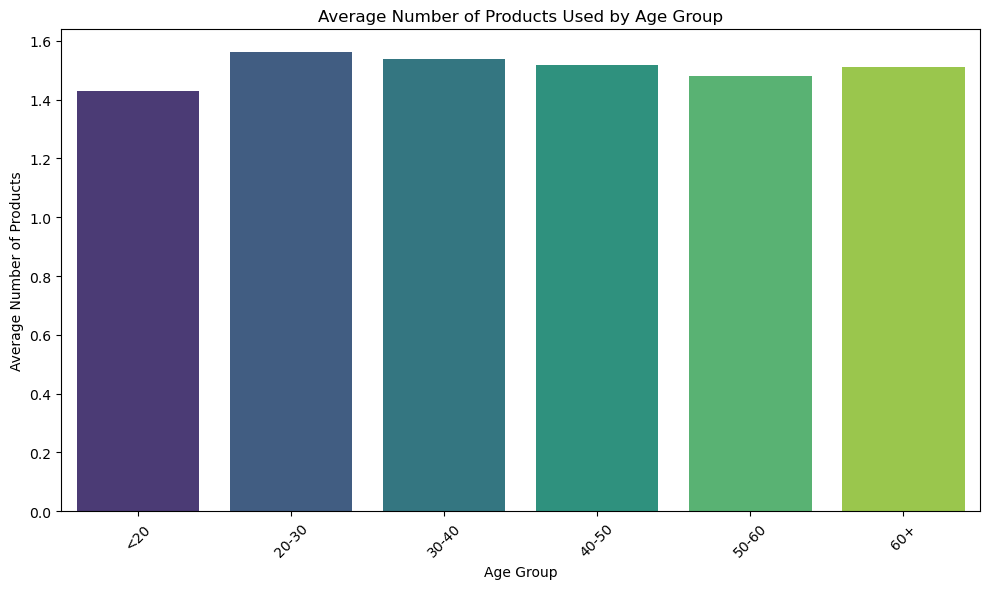

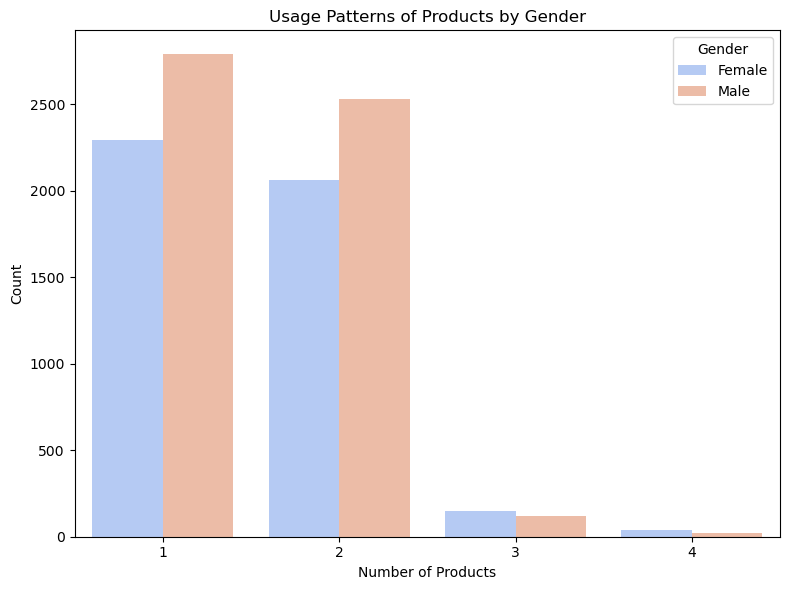

In [6]:
# Example: Analyzing product usage by age group
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average number of products used by age group
avg_products_by_age = df.groupby('AgeGroup')['NumOfProducts'].mean()

# Visualize average number of products used by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_products_by_age.index, y=avg_products_by_age.values, palette='viridis')
plt.title('Average Number of Products Used by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze usage patterns across different customer segments (e.g., by gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Gender', palette='coolwarm')
plt.title('Usage Patterns of Products by Gender')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Average Account Balance: $76485.89


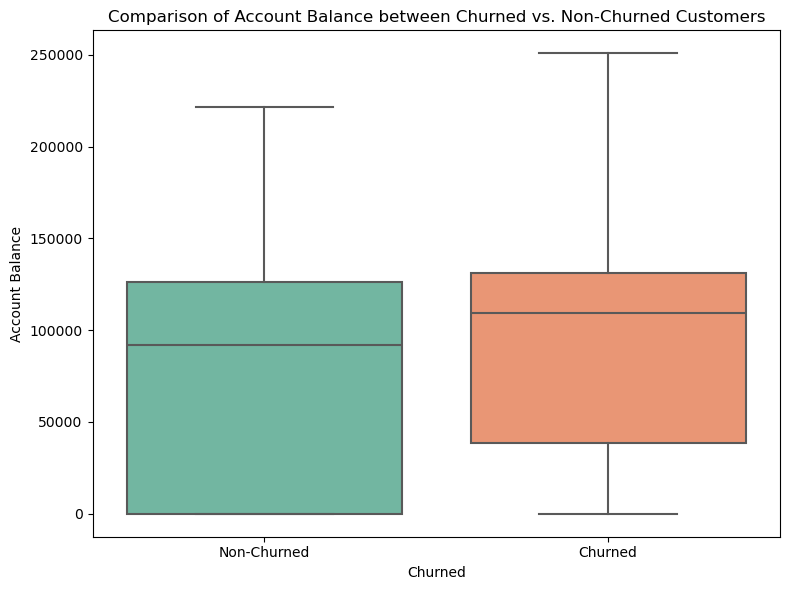

In [7]:
# 1. Calculate average account balance of customers
average_balance = df['Balance'].mean()
print(f"Average Account Balance: ${average_balance:.2f}")

# 2. Compare financial characteristics of churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='churned', y='Balance', data=df, palette='Set2')
plt.title('Comparison of Account Balance between Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.tight_layout()
plt.show()

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
AgeGroup           0
dtype: int64

In [10]:
# Display the first few rows of the dataset to inspect the column names and data types
print(df.head())
print(df.columns)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  churned AgeGroup  
0        101348.88        1    40-50  
1        112542.58        0    40-50  
2        113931.57        1    40-50  
3 

Accuracy: 0.8665

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Feature Importances:
              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421
9     Geography_Spain    0.013214


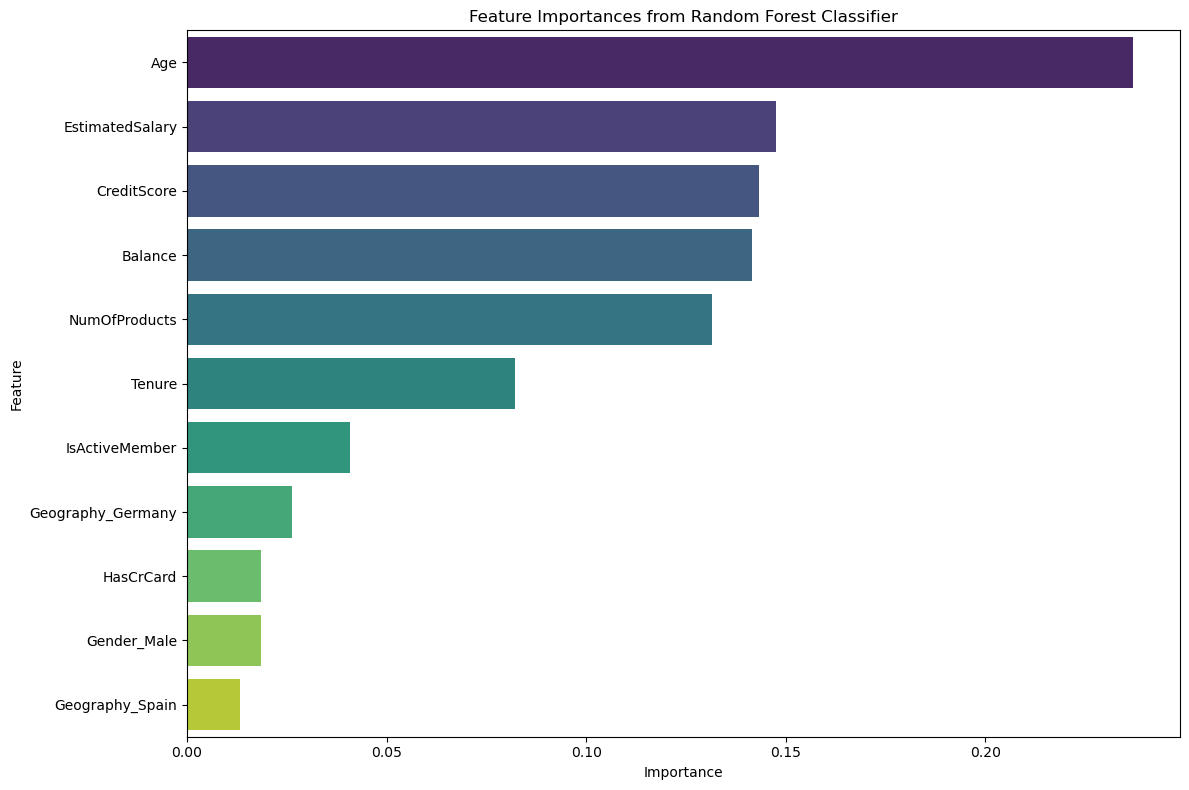


At-Risk Customers:
      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2750          481   57       9       0.00              3          1   
7487          651   56       4       0.00              1          0   
5272          850   47       6       0.00              1          1   
3337          579   56       4   99340.83              1          0   
3032          495   45       3   89158.94              3          1   
...           ...  ...     ...        ...            ...        ...   
6911          705   54       3  125889.30              3          1   
2794          646   52       8   59669.43              1          0   
7018          805   50       9  130023.38              1          1   
6412          602   53       5   98268.84              1          0   
7853          730   47       7       0.00              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2750               1        169719.35             

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


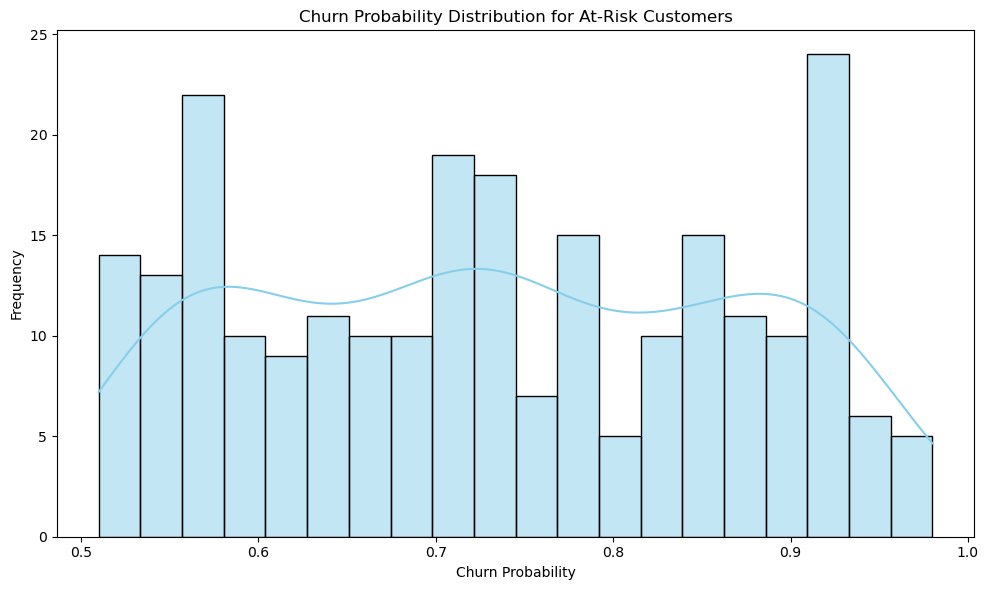


Summary Table of Key Characteristics for At-Risk Customers:
                           mean           std
CreditScore          638.327869    109.367876
Age                   49.143443      8.618093
Tenure                 4.926230      2.992908
Balance            92340.930287  55208.346214
NumOfProducts          1.643443      0.997898
HasCrCard              0.758197      0.429056
IsActiveMember         0.278689      0.449276
EstimatedSalary    98123.561393  60919.515616
Churn_Probability      0.733074      0.135084
Churn_Prediction       1.000000      0.000000
Actual_Churn           0.758197      0.429056


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pandas DataFrame with the dataset

# Selecting relevant features
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

X = df[features]
y = df['churned']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Extract feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predicting probabilities on the test data
y_prob = model.predict_proba(X_test)[:, 1]

# Add probabilities and predictions to the test set
X_test['Churn_Probability'] = y_prob
X_test['Churn_Prediction'] = y_pred
X_test['Actual_Churn'] = y_test.values

# Identify at-risk customers (high churn probability)
at_risk_customers = X_test[X_test['Churn_Probability'] > 0.5]  # Adjust threshold as needed

print("\nAt-Risk Customers:")
print(at_risk_customers)

# Visualize churn probability distribution for at-risk customers
plt.figure(figsize=(10, 6))
sns.histplot(at_risk_customers['Churn_Probability'], bins=20, kde=True, color='skyblue')
plt.title('Churn Probability Distribution for At-Risk Customers')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary table of key characteristics of at-risk customers
summary_table = at_risk_customers.describe().T[['mean', 'std']]
print("\nSummary Table of Key Characteristics for At-Risk Customers:")
print(summary_table)
